<a href="https://colab.research.google.com/github/AliyaBadmaeva/PDP/blob/main/Badmaeva_A_A__PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 9.7 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 10.7 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
!pip show transformers

Name: transformers
Version: 4.52.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /home/aliuska/anaconda3/envs/my_pdp/lib/python3.13/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [4]:
from transformers import BertTokenizer
from transformers.optimization import get_linear_schedule_with_warmup

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ссылка на датасет на Гитхабе
#IMDB = 'https://raw.githubusercontent.com/AliyaBadmaeva/imdb/master/IMDB_Dataset.zip'

In [6]:
train = pd.read_csv('train_df.csv')  # чтение данных с помощью библиотеки Pandas
test = pd.read_csv('test_df.csv')
val = pd.read_csv('val_df.csv')

train.head(10)  # Первые 10 строк датасета

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
5,3655,Umm yeah. That`s probably a pretty good note ...,2,positive
6,719,whatever do you mean?,1,neutral
7,22823,That would panic me a little! Maybe you can ...,0,negative
8,4869,Is sad when people`s phones are dead,0,negative
9,793,sad face.,0,negative


In [7]:
test.head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


In [8]:
val.head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


In [9]:
train.info()  # типы данных для каждого их признаков и количество строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5206 non-null   int64 
 1   text       5205 non-null   object
 2   label      5206 non-null   int64 
 3   sentiment  5206 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [12]:
train.describe()  # статистические данные

,id,label
count,31232.000000,31232.000000
mean,10576.775359,1.043961
std,8010.753795,0.790636
min,0.000000,0.000000
25%,3476.000000,0.000000
50%,8662.000000,1.000000
75%,17071.500000,2.000000
max,27480.000000,2.000000


In [13]:
train['label'].value_counts()  # количество данных в целевом признаке

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

In [14]:
test['label'].value_counts()

label
1    1930
2    1730
0    1546
Name: count, dtype: int64

In [15]:
val['label'].value_counts()

label
1    1928
2    1760
0    1517
Name: count, dtype: int64

In [16]:
# удалим нулевые значения по наличию в одном из 2х столбцах, чтобы не было потом проблем с созданием тензоров из списка строк
val.dropna(axis=0, how='any', subset=['text', 'label'], inplace=True)
train.dropna(axis=0, how='any',subset=['text', 'label'], inplace=True)
test.dropna(axis=0, how='any', subset=['text', 'label'], inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5205 entries, 0 to 5205
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 203.3+ KB


In [19]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [20]:
train.duplicated().sum()  # количество дублей

np.int64(0)

In [21]:
test.duplicated().sum()  # количество дублей

np.int64(0)

In [22]:
val.duplicated().sum()  # количество дублей

np.int64(0)

In [ ]:
'''!pip install --upgrade nbformat
!pip install --upgrade nbconvert'''

'!pip install --upgrade nbformat\n!pip install --upgrade nbconvert'

In [23]:
train.drop(['id','sentiment'],axis=1,inplace=True)
test.drop(['id','sentiment'],axis=1,inplace=True)
val.drop(['id','sentiment'],axis=1,inplace=True)

(array([2.2604e+04, 6.0550e+03, 1.1560e+03, 6.4400e+02, 6.5400e+02,
        6.8000e+01, 2.4000e+01, 8.0000e+00, 8.0000e+00, 7.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  20.5,  40. ,  59.5,  79. ,  98.5, 118. , 137.5, 157. ,
        176.5, 196. , 215.5, 235. , 254.5, 274. , 293.5, 313. , 332.5,
        352. , 371.5, 391. ]),
 <BarContainer object of 20 artists>)

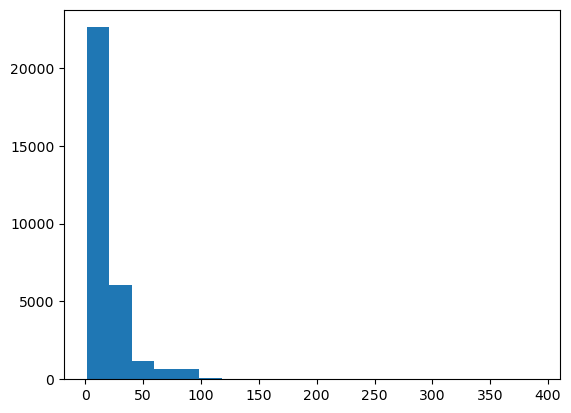

In [24]:
train_rev = [len(t.split()) for t in train['text']]
plt.hist(train_rev, bins=20)

In [25]:
from transformers import BertForSequenceClassification

In [26]:
# Reload it with the huggingface tokenizers library
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', lowercase=False)
tokenizer.save_pretrained('.')

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [27]:
X_train = train.text
X_test = test.text
X_val = val.text

y_train = train.label
y_test = test.label
y_val = val.label

In [28]:
MAX_LEN = 128

In [29]:
import torch
encodings_train = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')
encodings_val = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')
encodings_test = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')

'''labels_tensor_train = torch.tensor(y_train.tolist())
labels_tensor_val = torch.tensor(y_val.tolist())
labels_tensor_test = torch.tensor(y_test.tolist())'''

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_ds = NewsDataset(encodings_train, y_train)
valid_ds = NewsDataset(encodings_val, y_val)
test_ds = NewsDataset(encodings_test, y_test)


In [30]:
train_ds

In [31]:
from transformers import Trainer, TrainingArguments

In [40]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
 # !pip install 'accelerate>=0.26.0'

In [ ]:
# ! pip install transformers[torch]

In [41]:
from sklearn.metrics import accuracy_score, precision_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  prec = precision_score(labels, preds)
  return {
      'accuracy': acc,
      'precision': prec
  }

In [42]:
training_args = TrainingArguments(
    output_dir='./models',          # выходная директория
    num_train_epochs=3,              # количество эпох
    save_strategy='epoch',             # стратегия сохранения моделей
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    evaluate_during_training=True,
    do_train=True,
    do_eval=True,
    gradient_accumulation_steps=16,
    logging_steps=650,
    seed=42,
    eval_steps=650,
    save_steps=1000,               # сохранять каждые 1,000 шагов
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    compute_metrics=compute_metrics     # the callback that computes metrics of interest
) # https://huggingface.co/docs/transformers/main_classes/trainer

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'train_batch_size'. Did you mean 'auto_find_batch_size'?

In [39]:
# train the model
trainer.train()

Step,Training Loss
500,0.881800
1000,0.917800



KeyboardInterrupt



In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Обучение модели на тренировочных данных
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],
     X_train_encoded['attention_mask']], y_train,  # тренировочные данные
    validation_data=([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'],
                      X_val_encoded['attention_mask']],y_val),  # проверочные данные
    batch_size=32,  # размер выборки
    epochs=4)  # количество эпох обучения

Epoch 1/4
   5/1094 [..............................] - ETA: 22:51:11 - loss: 4.6549 - accuracy: 0.4563

In [ ]:
# Тестирование модели на тестовых данных
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'],
     X_test_encoded['attention_mask']], y_test)
print(f'Потери (loss) на тестовой выборке: {test_loss}, точность (accuracy) на тестовой выборке: {test_accuracy}')

In [ ]:
# Путь для сохранения модели на Google-Drive
model.save_pretrained('/content/Model')

In [ ]:
# Загрузка токенизатора с Google-диска
bert_tokenizer = BertTokenizer.from_pretrained('/content/Tokenizer')

# Загрузка модели с Google-Drive
bert_model = TFBertForSequenceClassification.from_pretrained('/content/Model')

In [ ]:
pred = bert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {1: 'Положительный', 0: 'Отрицательный'}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
real_labels = [label[i] for i in y_test]

print('Предсказанный класс:', pred_labels[:10])
print('Реальный класс     :', real_labels[:10])

In [ ]:
print("Classification Report: \n", classification_report(real_labels, pred_labels))

In [ ]:
def plot_confusion_matrix(cm, classes):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap='PiYG')
    plt.title('Матрица ошибок', fontsize=20, fontweight='light', fontfamily='serif', color='white')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15, fontweight='light', fontfamily='serif', color='white')
    plt.yticks(tick_marks, classes, fontsize=15, fontweight='light', fontfamily='serif', color='white')
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white")

    plt.ylabel('Реальный класс', fontsize=18, fontweight='light', fontfamily='serif', color='white')
    plt.xlabel('Предсказанный класс', fontsize=18, fontweight='light', fontfamily='serif', color='white')

In [ ]:
conf_matrix = confusion_matrix(real_labels, pred_labels)
plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_matrix, classes=y_test.unique())
plt.show()

In [ ]:
def get_predict(review, Tokenizer=bert_tokenizer, Model=bert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(review, list):
        review = [review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [ ]:
review = """French film 'Magnificent Trip', released in 2022. It is a very touching film, in which an old lady goes with
            a taxi driver to a nursing home. During the trip, she tells the taxi driver about both difficult life situations
            and the most memorable moments of the 92-year-old lady's life. The film is worthy of an award, it has only
            a few actors, but the level of acting is high, and there are also beautiful views of Paris."""
get_predict(review)